In [1]:
import pandas as pd 
import numpy as np 
import re
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno
from scipy import stats

In [3]:
file_path ='dataset.csv'
df=pd.read_csv(file_path)
df

,LoanID,ApplicantID,ApplicantGender,ApplicantMarried,ApplicantDependents,ApplicantEducation,ApplicantSelfEmployed,ApplicantIncome,ApplicantCreditHistory,ApplicantZIP,ApplicantState,ApplicantEmplLength,ApplicantHomeOwn,LoanAmount,LoanTerm,LoanIntRate,LoanDesc,LoanPurpose,LoanApproved
0,56026,19874,Moški,NE,0 oseb,Diplomiral,NE,1949.666667,1.0,33xx,Slovenija,5 let,STANOVANJSKI KREDIT,NaN,90.0,1.42%,NaN,prenova,Y
1,53884,34258,Moški,DA,1 oseba,Diplomiral,NE,1527.666667,1.0,64xx,Slovenija,10+ let,NAJEM,44800.0,90.0,3.90%,NaN,drugo,N
2,48350,66552,Moški,DA,0 oseb,Brez diplome,NE,861.000000,1.0,30xx,si,3 leta,NAJEM,42000.0,90.0,2.80%,NaN,NaN,Y
3,30455,54844,Moški,DA,2 osebi,Diplomiral,NE,1066.666667,1.0,84xx,SI,1 leto,NAJEM,24500.0,90.0,3.26%,NaN,NaN,Y
4,935,18820,Moški,DA,2 osebi,Diplomiral,NaN,833.333333,1.0,60xx,SI,10+ let,STANOVANJSKI KREDIT,38150.0,90.0,3.26%,NaN,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38762,19296,7212,NaN,DA,1 oseba,Diplomiral,NE,873.333333,1.0,14xx,SI,NaN,NAJEM,57750.0,90.0,2.89%,NaN,kartica,Y
38763,20271,32616,Moški,NE,0 oseb,Diplomiral,NE,3107.666667,1.0,63xx,Slo,3 leta,STANOVANJSKI KREDIT,17500.0,90.0,1.52%,Posojilojemalec je dodal na 02-06-14 > Samo o...,NaN,Y
38764,27733,46393,Ženska,DA,NaN,Diplomiral,DA,800.000000,0.0,42xx,SI,2 leti,LASTNO,58800.0,90.0,2.50%,NaN,NaN,N
38765,42707,20062,Moški,DA,3+ osebe,Diplomiral,NE,1365.000000,NaN,84xx,SI,3 leta,STANOVANJSKI KREDIT,43050.0,120.0,1.78%,NaN,NaN,Y


In [4]:
data_info = df.info()
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38767 entries, 0 to 38766
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LoanID                  38767 non-null  int64  
 1   ApplicantID             38767 non-null  int64  
 2   ApplicantGender         37902 non-null  object 
 3   ApplicantMarried        38573 non-null  object 
 4   ApplicantDependents     37775 non-null  object 
 5   ApplicantEducation      38767 non-null  object 
 6   ApplicantSelfEmployed   36702 non-null  object 
 7   ApplicantIncome         38767 non-null  float64
 8   ApplicantCreditHistory  35687 non-null  float64
 9   ApplicantZIP            38767 non-null  object 
 10  ApplicantState          38767 non-null  object 
 11  ApplicantEmplLength     36924 non-null  object 
 12  ApplicantHomeOwn        38767 non-null  object 
 13  LoanAmount              37370 non-null  float64
 14  LoanTerm                37863 non-null

In [5]:
df.shape

(38767, 19)

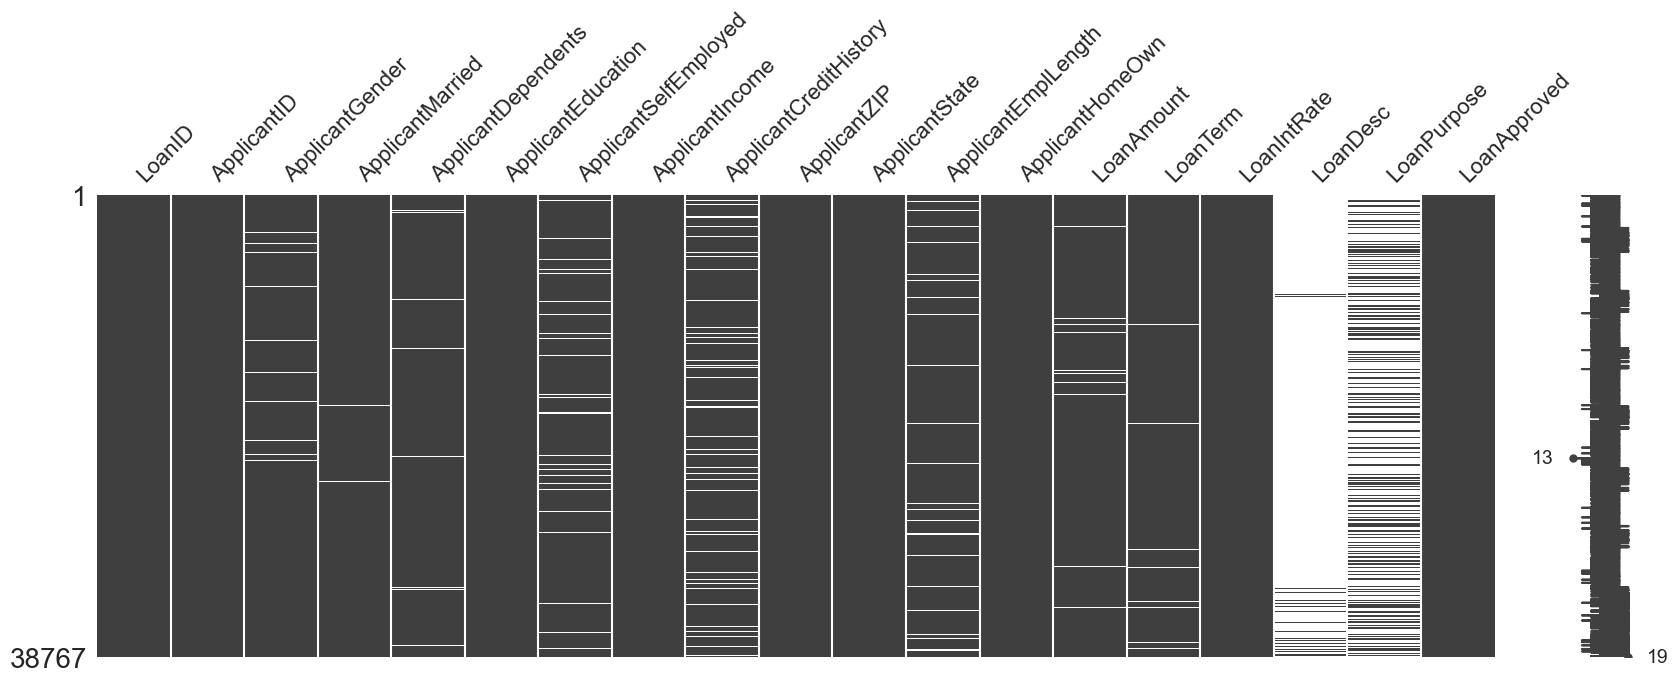

In [6]:
msno.matrix(df, figsize=(20, 6))
plt.show()

In [7]:
print(df.describe().T)

                          count          mean           std     min      25%  \
LoanID                  38767.0  34552.451441  19888.051126     1.0  17433.5   
ApplicantID             38767.0  34544.994918  19990.383285     1.0  17141.5   
ApplicantIncome         38767.0   1801.602781   2013.534166    50.0    963.0   
ApplicantCreditHistory  35687.0      0.842099      0.364653     0.0      1.0   
LoanAmount              37370.0  51087.712069  29882.568304  3150.0  35000.0   
LoanTerm                37863.0     85.473576     16.198891     3.0     90.0   

                            50%           75%       max  
LoanID                  34460.0  51691.000000   69133.0  
ApplicantID             34480.0  51847.500000   69134.0  
ApplicantIncome          1271.0   1933.333333   27000.0  
ApplicantCreditHistory      1.0      1.000000       1.0  
LoanAmount              44800.0  58450.000000  245000.0  
LoanTerm                   90.0     90.000000     120.0  


In [8]:
# llogarit perqindjen e rreshtave te dyfishte ne DataFrame
duplicated=df.duplicated().sum()
print((duplicated/len(df))*100 , '%')

0.0 %


<Axes: >

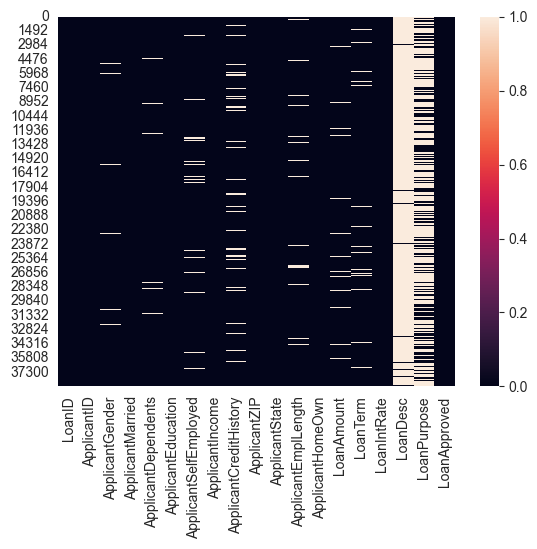

In [9]:
sns.heatmap(df.isnull())

In [10]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data_sorted = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=True)

print("\nMissing values in the dataset:\n", missing_data_sorted)


Missing values in the dataset:
                         Missing Values  Percentage
ApplicantMarried                   194    0.500426
ApplicantGender                    865    2.231279
LoanTerm                           904    2.331880
ApplicantDependents                992    2.558877
LoanAmount                        1397    3.603580
ApplicantEmplLength               1843    4.754043
ApplicantSelfEmployed             2065    5.326695
ApplicantCreditHistory            3080    7.944902
LoanPurpose                      23922   61.707122
LoanDesc                         37246   96.076560


In [11]:
df.drop(['LoanDesc', 'ApplicantState'], axis=1, inplace=True)

In [12]:
df['ApplicantDependents'] = df['ApplicantDependents'].replace({
    '0 oseb': 0, '1 oseba': 1, '2 osebi': 2, '3+ osebe': 3
}).astype('float')

In [13]:
df['ApplicantZIP'] = df['ApplicantZIP'].str.replace('xx', '').astype(int)

print(df[['ApplicantZIP']].head())

   ApplicantZIP
0            33
1            64
2            30
3            84
4            60


In [14]:
df['ApplicantGender'] = df['ApplicantGender'].replace({'Moški': 'Male', 'Ženska': 'Female'})

In [15]:
def clean_employment_length(value):
    if isinstance(value, str):
        match = re.search(r"(\d+)", value)
        if match:
            return float(match.group(1))
        elif "< 1" in value:
            return 0.5
    return value

In [17]:
df['ApplicantEmplLength'] = df['ApplicantEmplLength'].apply(clean_employment_length).astype('float')

In [18]:
df['LoanIntRate']= df['LoanIntRate'].str.replace('%','').astype('float')


In [19]:
df['LoanTerm'].fillna(df['LoanTerm'].mode()[0], inplace=True)
df['LoanAmount'].fillna(int(df['LoanAmount'].mean()), inplace=True)
df['LoanPurpose'].fillna('Unknown', inplace=True)
for column in ['ApplicantDependents', 'ApplicantEmplLength']: 
   df[column].fillna(df[column].median(), inplace=True)

for column in ['ApplicantGender', 'ApplicantMarried', 'ApplicantSelfEmployed', 'ApplicantCreditHistory']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [20]:
df

,LoanID,ApplicantID,ApplicantGender,ApplicantMarried,ApplicantDependents,ApplicantEducation,ApplicantSelfEmployed,ApplicantIncome,ApplicantCreditHistory,ApplicantZIP,ApplicantEmplLength,ApplicantHomeOwn,LoanAmount,LoanTerm,LoanIntRate,LoanPurpose,LoanApproved
0,56026,19874,Male,NE,0.0,Diplomiral,NE,1949.666667,1.0,33,5.0,STANOVANJSKI KREDIT,51087.0,90.0,1.42,prenova,Y
1,53884,34258,Male,DA,1.0,Diplomiral,NE,1527.666667,1.0,64,10.0,NAJEM,44800.0,90.0,3.90,drugo,N
2,48350,66552,Male,DA,0.0,Brez diplome,NE,861.000000,1.0,30,3.0,NAJEM,42000.0,90.0,2.80,Unknown,Y
3,30455,54844,Male,DA,2.0,Diplomiral,NE,1066.666667,1.0,84,1.0,NAJEM,24500.0,90.0,3.26,Unknown,Y
4,935,18820,Male,DA,2.0,Diplomiral,NE,833.333333,1.0,60,10.0,STANOVANJSKI KREDIT,38150.0,90.0,3.26,Unknown,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38762,19296,7212,Male,DA,1.0,Diplomiral,NE,873.333333,1.0,14,7.0,NAJEM,57750.0,90.0,2.89,kartica,Y
38763,20271,32616,Male,NE,0.0,Diplomiral,NE,3107.666667,1.0,63,3.0,STANOVANJSKI KREDIT,17500.0,90.0,1.52,Unknown,Y
38764,27733,46393,Female,DA,0.0,Diplomiral,DA,800.000000,0.0,42,2.0,LASTNO,58800.0,90.0,2.50,Unknown,N
38765,42707,20062,Male,DA,3.0,Diplomiral,NE,1365.000000,1.0,84,3.0,STANOVANJSKI KREDIT,43050.0,120.0,1.78,Unknown,Y


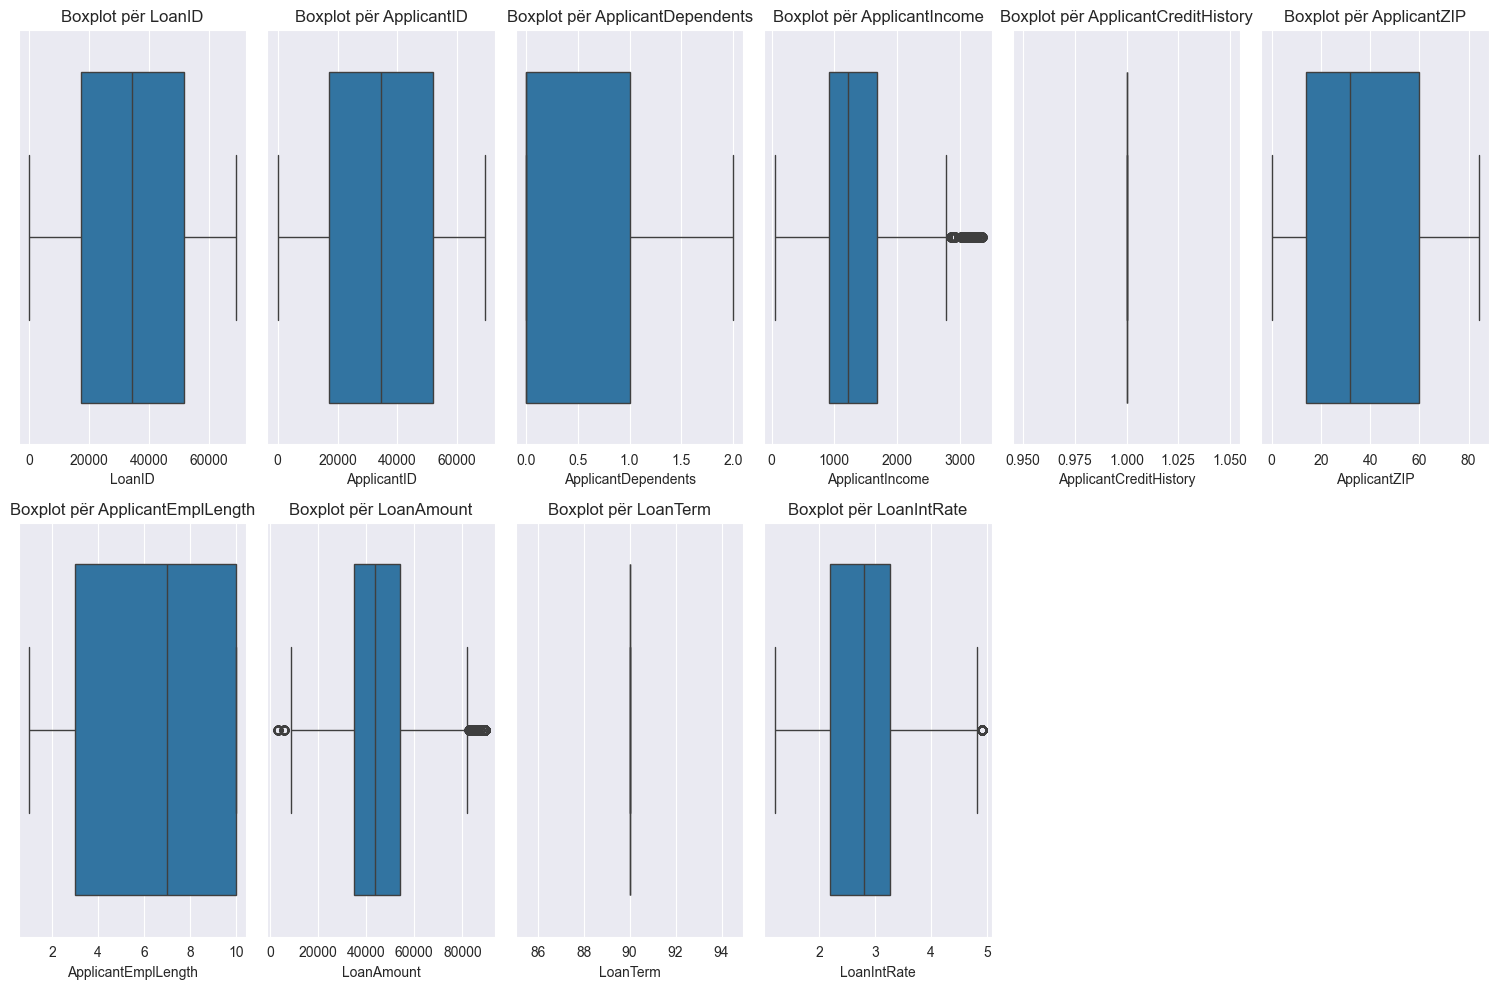

In [21]:
def detect_outliers_with_plot(df):
   
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    
    df_cleaned = df.copy()
    
    plt.figure(figsize=(15, 10))
    
    for i, col in enumerate(numeric_columns, 1):
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
        
        plt.subplot(2, len(numeric_columns) // 2 + 1, i)
        sns.boxplot(x=df_cleaned[col])
        plt.title(f'Boxplot për {col}')
    
    plt.tight_layout()
    plt.show()
    
    return df_cleaned

df_cleaned = detect_outliers_with_plot(df)

In [22]:
# Llogaritja e Q1 dhe Q3
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

# Zbulimi i përjashtuesve
outliersLoanAmount = df[(df['LoanAmount'] < (Q1 - 1.5 * IQR)) | (df['LoanAmount'] > (Q3 + 1.5 * IQR))]
print("Numri i zbulimeve jo të sakta:", len(outliersLoanAmount))


Numri i zbulimeve jo të sakta: 2506


In [23]:

Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Zbulimi i përjashtuesve
outliersApplicantIncome = df[(df['ApplicantIncome'] < (Q1 - 1.5 * IQR)) | (df['ApplicantIncome'] > (Q3 + 1.5 * IQR))]
print("Numri i zbulimeve jo të sakta ne ApplicantIncome:", len(outliersApplicantIncome))

Numri i zbulimeve jo të sakta ne ApplicantIncome: 3133


In [24]:
df_cleaned

,LoanID,ApplicantID,ApplicantGender,ApplicantMarried,ApplicantDependents,ApplicantEducation,ApplicantSelfEmployed,ApplicantIncome,ApplicantCreditHistory,ApplicantZIP,ApplicantEmplLength,ApplicantHomeOwn,LoanAmount,LoanTerm,LoanIntRate,LoanPurpose,LoanApproved
0,56026,19874,Male,NE,0.0,Diplomiral,NE,1949.666667,1.0,33,5.0,STANOVANJSKI KREDIT,51087.0,90.0,1.42,prenova,Y
1,53884,34258,Male,DA,1.0,Diplomiral,NE,1527.666667,1.0,64,10.0,NAJEM,44800.0,90.0,3.90,drugo,N
2,48350,66552,Male,DA,0.0,Brez diplome,NE,861.000000,1.0,30,3.0,NAJEM,42000.0,90.0,2.80,Unknown,Y
3,30455,54844,Male,DA,2.0,Diplomiral,NE,1066.666667,1.0,84,1.0,NAJEM,24500.0,90.0,3.26,Unknown,Y
4,935,18820,Male,DA,2.0,Diplomiral,NE,833.333333,1.0,60,10.0,STANOVANJSKI KREDIT,38150.0,90.0,3.26,Unknown,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38759,62223,30205,Male,DA,2.0,Brez diplome,NE,730.666667,1.0,11,7.0,NAJEM,44800.0,90.0,4.74,Unknown,Y
38760,51071,57493,Male,NE,0.0,Diplomiral,NE,1271.333333,1.0,14,6.0,STANOVANJSKI KREDIT,39200.0,90.0,3.65,Unknown,Y
38762,19296,7212,Male,DA,1.0,Diplomiral,NE,873.333333,1.0,14,7.0,NAJEM,57750.0,90.0,2.89,kartica,Y
38763,20271,32616,Male,NE,0.0,Diplomiral,NE,3107.666667,1.0,63,3.0,STANOVANJSKI KREDIT,17500.0,90.0,1.52,Unknown,Y


In [25]:
# Korelacioni ndërmjet kolonave numerike
df_cleaned.corr(numeric_only=True)

,LoanID,ApplicantID,ApplicantDependents,ApplicantIncome,ApplicantCreditHistory,ApplicantZIP,ApplicantEmplLength,LoanAmount,LoanTerm,LoanIntRate
LoanID,1.000000,0.005171,0.002953,-0.000646,NaN,0.002045,-0.008695,-0.003956,NaN,-0.002340
ApplicantID,0.005171,1.000000,0.012079,0.005831,NaN,-0.002014,0.006084,0.007989,NaN,0.008097
ApplicantDependents,0.002953,0.012079,1.000000,0.010119,NaN,-0.000406,-0.006309,0.005795,NaN,-0.002162
ApplicantIncome,-0.000646,0.005831,0.010119,1.000000,NaN,0.015338,0.006257,0.002528,NaN,0.000516
ApplicantCreditHistory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantZIP,0.002045,-0.002014,-0.000406,0.015338,NaN,1.000000,-0.004786,-0.004955,NaN,0.012615
ApplicantEmplLength,-0.008695,0.006084,-0.006309,0.006257,NaN,-0.004786,1.000000,-0.005266,NaN,0.052898
LoanAmount,-0.003956,0.007989,0.005795,0.002528,NaN,-0.004955,-0.005266,1.000000,NaN,0.001213
LoanTerm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LoanIntRate,-0.002340,0.008097,-0.002162,0.000516,NaN,0.012615,0.052898,0.001213,NaN,1.000000


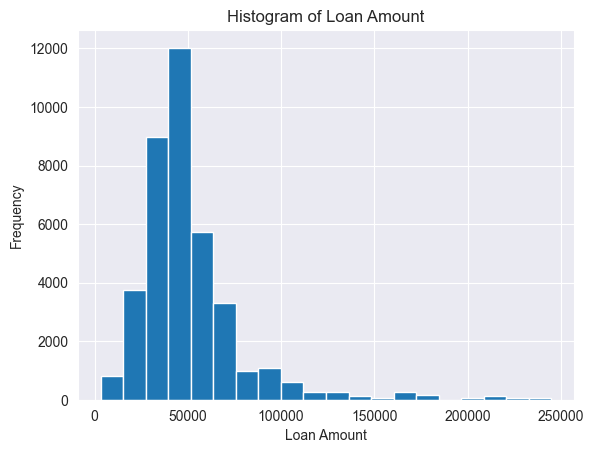

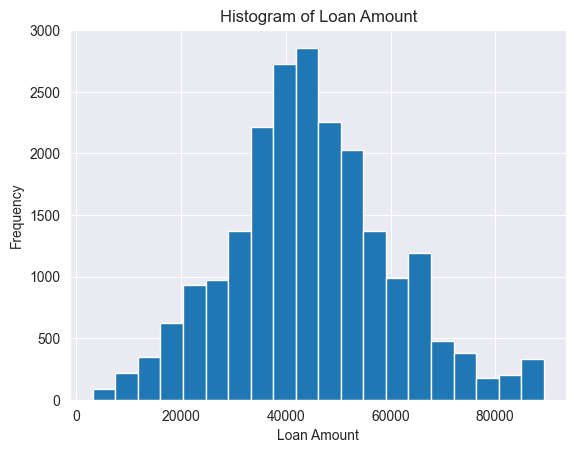

In [26]:
# Histogram për shpërndarjen e të dhënave
df['LoanAmount'].hist(bins=20)
plt.title('Histogram of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Histogram për shpërndarjen e të dhënave
df_cleaned['LoanAmount'].hist(bins=20)
plt.title('Histogram of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

Histogram për shpërndarjen e të dhënave

In [ ]:
df['ApplicantIncome'].hist(bins=20)
plt.title('Histogram of ApplicantIncome')
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.show()

Histogram për shpërndarjen e të dhënave

In [ ]:
df_cleaned['ApplicantIncome'].hist(bins=20)
plt.title('Histogram of ApplicantIncome')
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['LoanIntRate'].hist(bins=20)
plt.title('Histogram of LoanIntRate')
plt.xlabel('LoanIntRate')
plt.ylabel('Frequency')
plt.show()